In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

> 파일을 읽어줍니다.

In [ ]:
path1 = '/content/drive/MyDrive/3) 교육팀/12기 에듀세션/** 12기 퀘스트 제출 **/세션 9 퀘스트 제출/train_extra_columns.csv'
path2 = '/content/drive/MyDrive/3) 교육팀/12기 에듀세션/세션 9 메인 팀플 퀘스트/data/train.csv'

train = pd.read_csv(path1)
test = pd.read_csv(path2)

In [ ]:
train.shape

(25995, 12)

In [ ]:
test.shape

(103976, 13)

In [ ]:
train.head()

In [ ]:
train.info()

> predictor variable과 target variable을 분리합니다.

In [ ]:
train.head()

,country,description,designation,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,France,This medium-pink rosé is a blend of 40% Grenac...,Vieilles Vignes,15.0,Rhône Valley,Costières de Nîmes,NaN,Joe Czerwinski,@JoeCz,Château de Nages 2013 Vieilles Vignes Rosé (Co...,Rosé,Château de Nages
1,Argentina,Like almost every wine in Trapiche's single-vi...,Finca Ambrosia Terroir Series Single Vineyard,50.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Trapiche 2010 Finca Ambrosia Terroir Series Si...,Malbec,Trapiche
2,US,"From Paso Robles's warmer eastside, this wine ...",Estate Grown,38.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Still Waters 2011 Estate Grown Primitivo (Paso...,Primitivo,Still Waters
3,Italy,This is a bright and perky red wine with well-...,Raboso,25.0,Veneto,Piave,NaN,NaN,NaN,Moletto 2003 Raboso Raboso (Piave),Raboso,Moletto
4,US,This wine is a blend of 40% each Mourvèdre and...,Harvest Moon,20.0,Idaho,NaN,NaN,Sean P. Sullivan,@wawinereport,Williamson Vineyard 2012 Harvest Moon Red,Red Blend,Williamson Vineyard


In [ ]:
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightgreen", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(train)

,Missing Values,% Value
region_2,15892,61
designation,7456,28
taster_twitter_handle,6231,23
taster_name,5273,20
region_1,4225,16
price,1801,6
country,12,0
province,12,0
description,0,0
title,0,0


In [18]:
# 컬럼별 데이터 종류(카테고리) 수. 범주형 변수가 많아 카테고리의 개수를 파악해 봄
pd.DataFrame([len(train[i].unique()) for i in train.columns], index=train.columns, columns=['unique count'])

,unique count
country,44
description,97550
designation,32962
price,369
province,408
region_1,1189
region_2,18
taster_name,20
taster_twitter_handle,16
title,96761


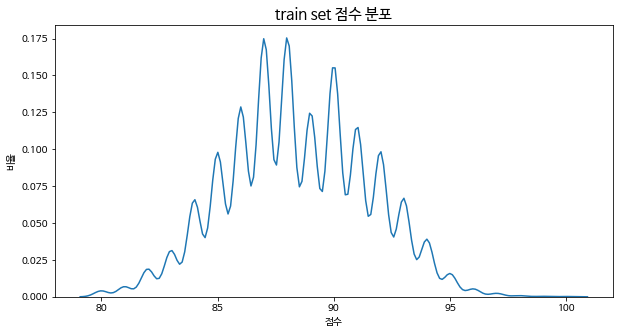

In [19]:
plt.figure(figsize=(10,5))
sns.kdeplot(train.points)
plt.xlabel('점수')
plt.ylabel('비율')
plt.title('train set 점수 분포',fontsize=15)
plt.show()

### Taster, Price EDA

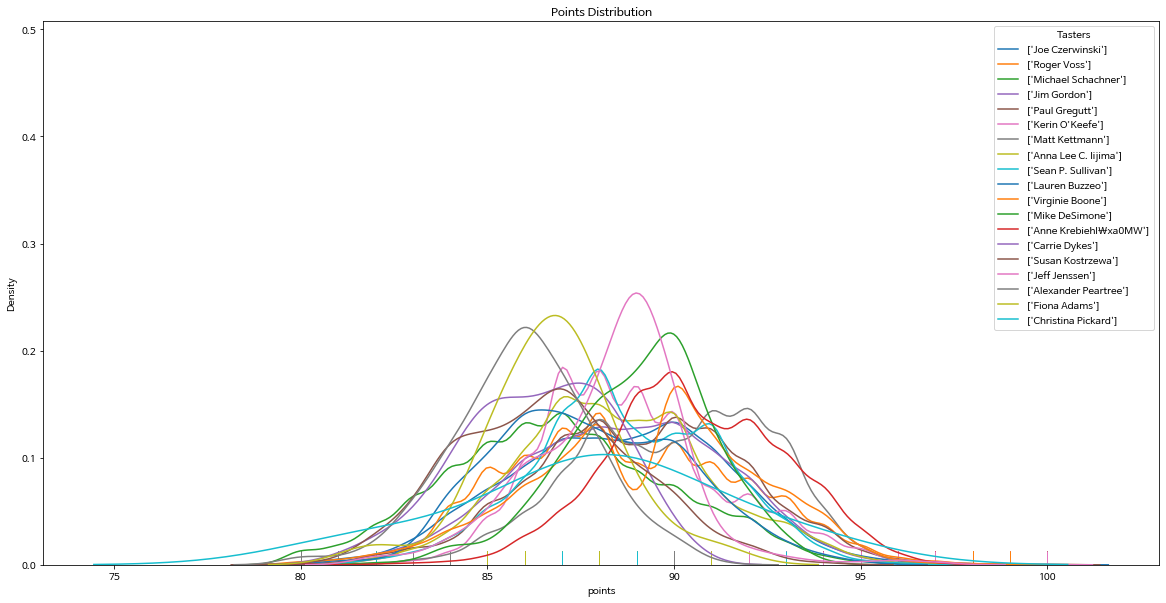

In [ ]:
targets = [train.loc[train['taster_name'] == val] for val in train['taster_name'].unique()]
plt.figure(figsize=(20,10))
for target in targets:
    sns.distplot(target['points'], hist=False, rug=True, label=target['taster_name'].unique())
plt.title('Points Distribution')
plt.legend(title='Tasters')
plt.show()

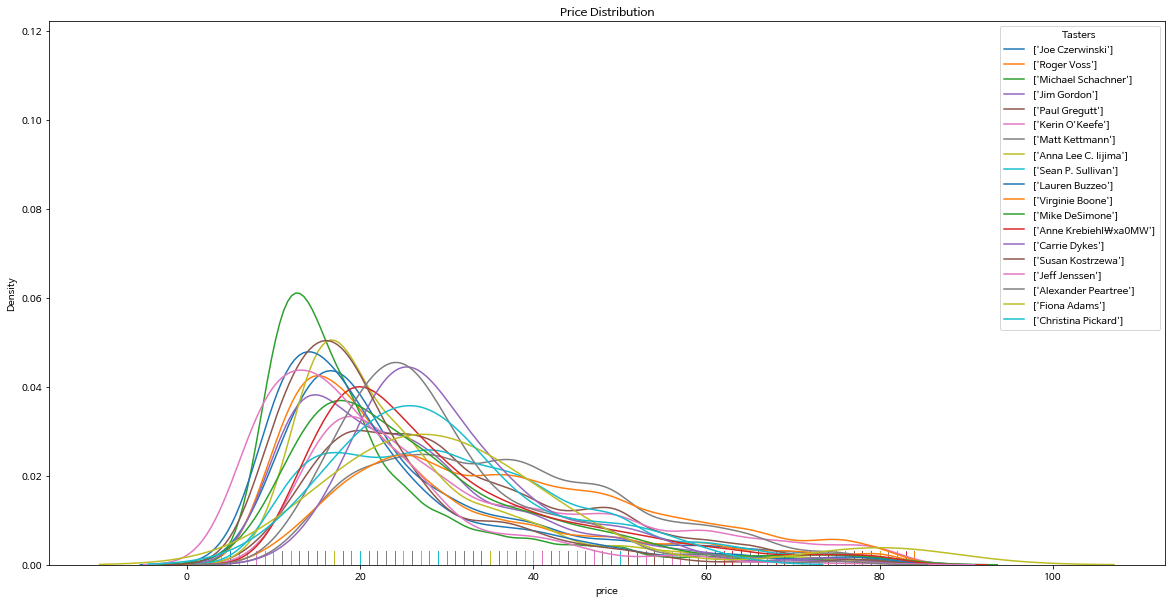

In [ ]:
train_cut = train[train.price < train.price.quantile(0.95)]
targets = [train_cut.loc[train_cut['taster_name'] == val] for val in train_cut['taster_name'].unique()]
plt.figure(figsize=(20,10))
for target in targets:
  sns.distplot(target['price'], hist=False, rug=True, label=target['taster_name'].unique())
plt.title('Price Distribution')
plt.legend(title='Tasters')
plt.show()

Skewness: 19.114
Kurtosis: 883.273
---------------------------
count    96781.000000
mean        35.437410
std         42.425377
min          4.000000
25%         17.000000
50%         25.000000
75%         42.000000
max       3300.000000
Name: price, dtype: float64
---------------------------


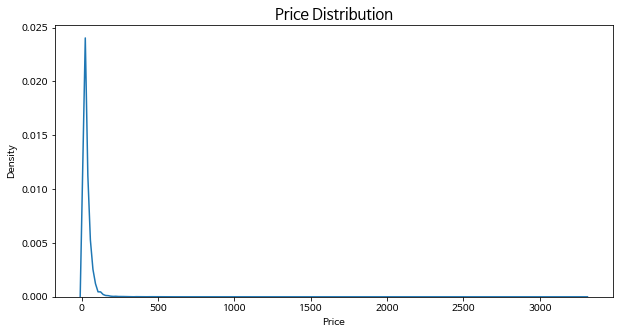

In [ ]:
td = train.price
print("Skewness: %.3f" % td.skew())  # Skewness
print("Kurtosis: %.3f" % td.kurt())  # Kurtosis
print('---------------------------')
print(td.describe())
print('---------------------------')
plt.figure(figsize=(10,5))
sns.kdeplot(td)
plt.xlabel('Price')
plt.title('Price Distribution',fontsize=15)
plt.show()

Skewness: 1.038
Kurtosis: 0.413
---------------------------
count    91845.000000
mean        29.578573
std         16.809548
min          4.000000
25%         17.000000
50%         25.000000
75%         40.000000
max         84.000000
Name: price, dtype: float64
---------------------------


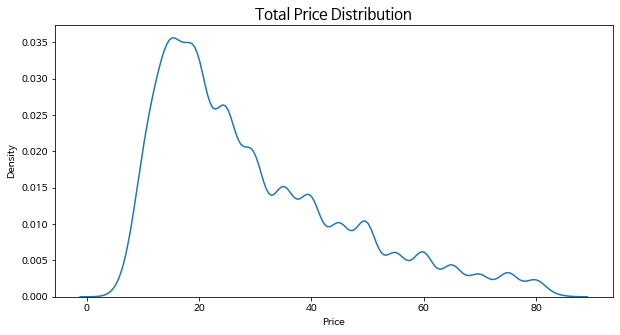

In [ ]:
td = train.price
td_cut = td[td < td.quantile(0.95)]
print("Skewness: %.3f" % td_cut.skew())  # Skewness
print("Kurtosis: %.3f" % td_cut.kurt())  # Kurtosis
print('---------------------------')
print(td_cut.describe())
print('---------------------------')
plt.figure(figsize=(10,5))
sns.kdeplot(td_cut)
plt.xlabel('Price')
plt.title('Total Price Distribution',fontsize=15)
plt.show()

### Country, Province, Region EDA

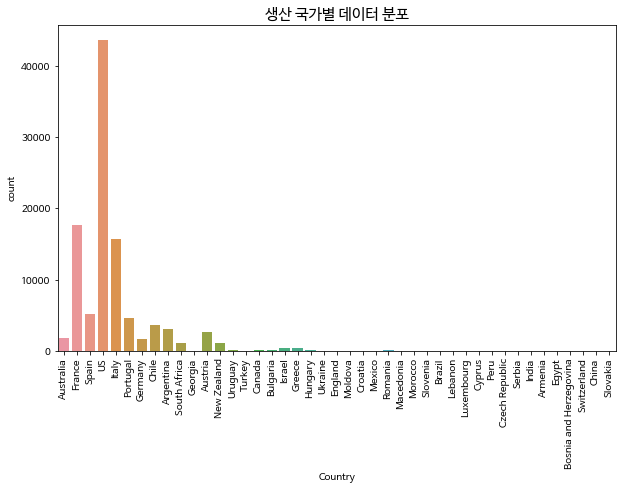

In [20]:
plt.figure(figsize=(10,6))
cnt = sns.countplot(x='country', data=train) 
cnt.set_xlabel("Country")
cnt.set_ylabel("count")
plt.xticks(rotation=90) 
plt.title('생산 국가별 데이터 분포',fontsize=15)
plt.show()

In [21]:
# 개수를 표로 나타내기
count = train.groupby("country")['country'].count()
countdf = pd.DataFrame(count.values, columns=['country_count'])
countdf['country'] = count.index
countdf.sort_values(by='country_count').tail(10)

,country_count,country
17,1755,Germany
2,1859,Australia
3,2654,Austria
0,3037,Argentina
8,3589,Chile
31,4593,Portugal
37,5221,Spain
22,15659,Italy
15,17749,France
40,43578,US


#### "region"이라는 새로운 변수 지정
##### 특정 국가에서 발생빈도수가 과도하게 높으므로, 데이터 빈도가 너무 높은 지역은 province별로 쪼개어서 생산지역(region)으로 정의하고, 그외는 국가 자체를 생산지역으로 정의함
이를 위해 국가별로 count 값을 새로운 컬럼으로 지정한 후, count가 1만개 이상인 것과 그렇지 않은 국가들을 분리하여 각각 provine와 country 값을 region 컬럼에 데이터로 넣어줌.

In [22]:
train = pd.merge(train, countdf, how='left', on='country')

In [23]:
freq_country = train[train['country_count'] > 10000]
country_enough = train[train['country_count'] <= 10000]

freq_country['region'] = freq_country['province']
country_enough['region'] = country_enough['country']

train_province = pd.concat([freq_country, country_enough])

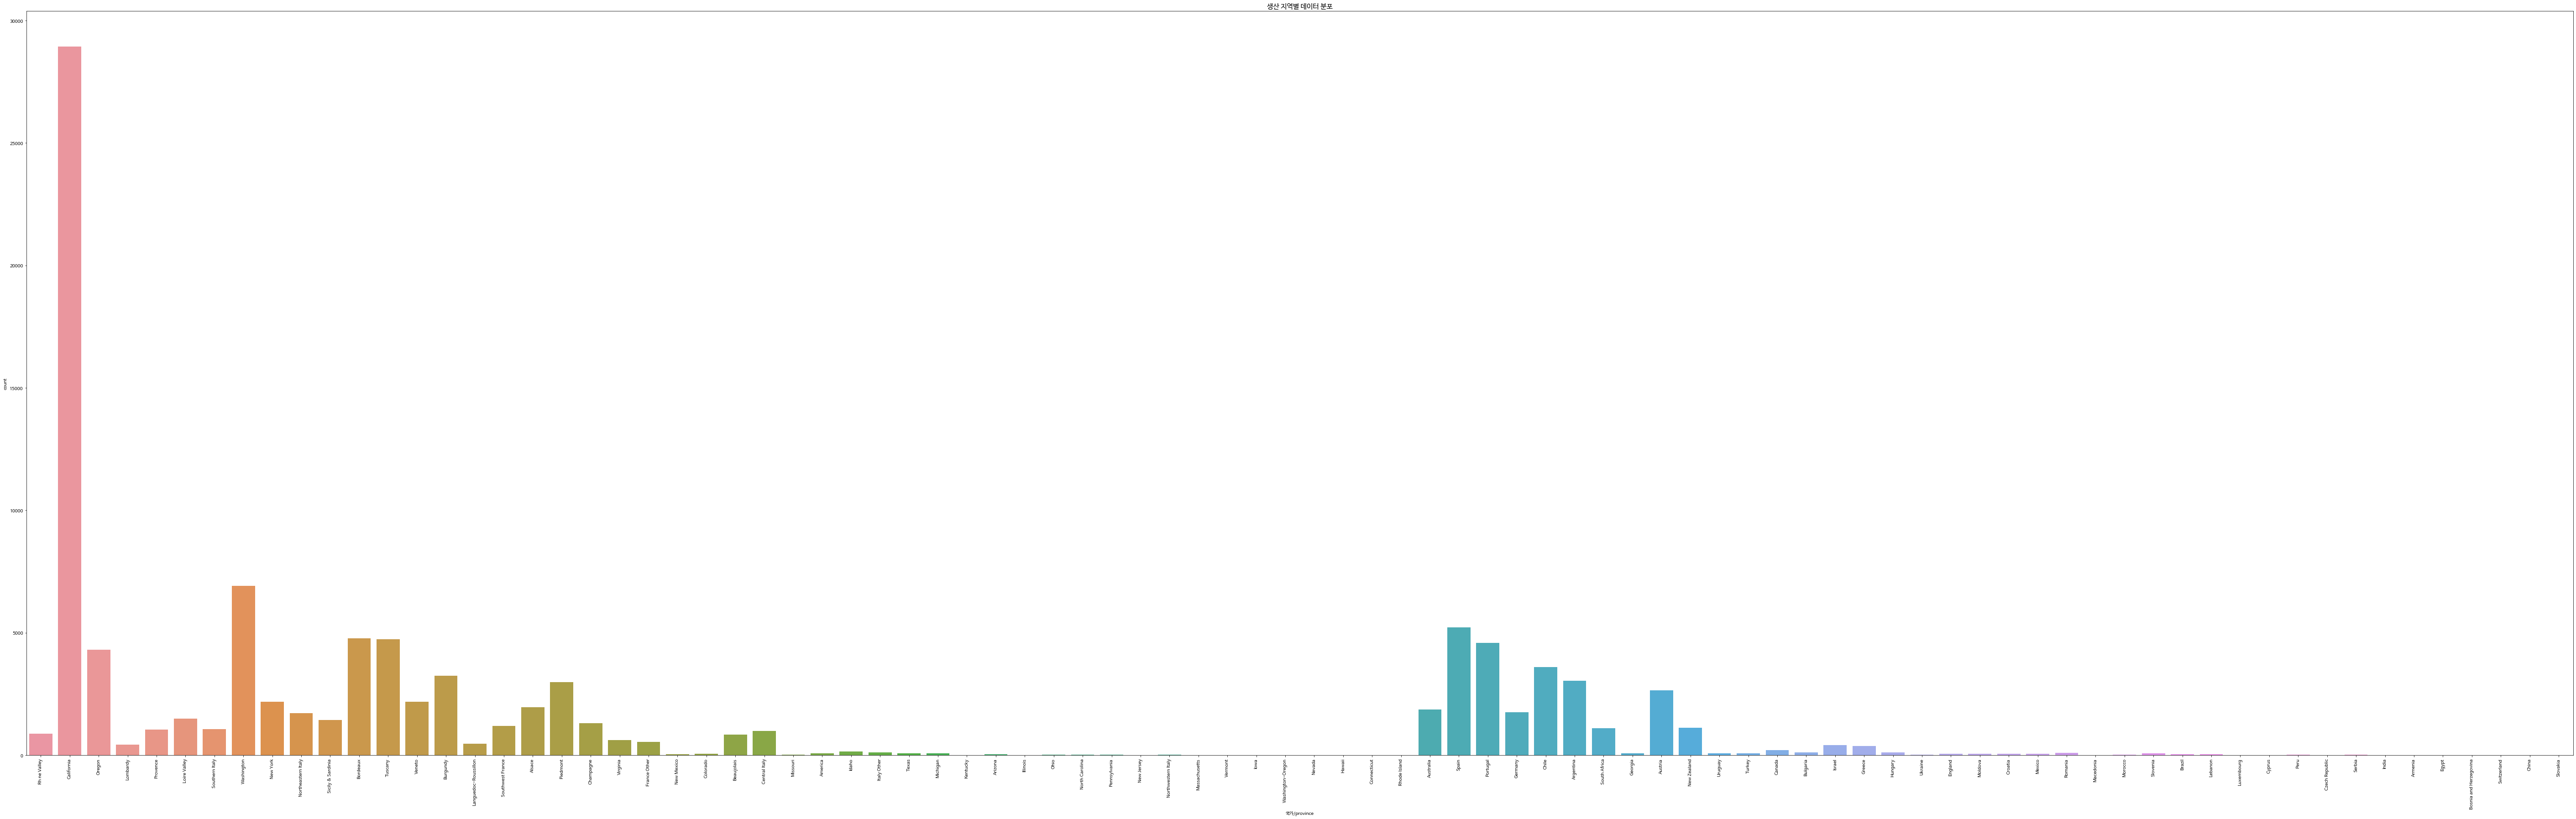

In [24]:
plt.figure(figsize=(100,30))
cnt = sns.countplot(x='region', data=train_province) 
cnt.set_xlabel("국가/province")
cnt.set_ylabel("count")
plt.xticks(rotation=90) 
plt.title('생산 지역별 데이터 분포',fontsize=15)
plt.show()

여전히 특정 지역에서 1만개 이상의 빈도를 가지므로 한번 더 빈도 수를 표 형태로 출력

In [25]:
reg_cnt = train_province.groupby("region")['region'].count()
reg_cnt
reg_cnt_df = pd.DataFrame(reg_cnt.values, columns=['reg_count'])
reg_cnt_df['region'] = reg_cnt.index

reg_cnt_df.sort_values(by='reg_count').tail()

,reg_count,region
80,4729,Tuscany
8,4776,Bordeaux
76,5221,Spain
86,6916,Washington
13,28941,California


캘리포니아에서 유독 높은 빈도를 가지므로, 캘리포니아만 따로 추출해서 region 변수의 데이터를 region_1의 값으로 추가적으로 세분화 해줌.

In [26]:
cal = train_province[train_province['region'] == 'California']
not_cal = train_province[train_province['region'] != 'California']

cal_cnt = cal.groupby("region_1")['region_1'].count()
cal_cnt_df = pd.DataFrame(cal_cnt.values, columns=['cal_reg_count'])
cal_cnt_df['region_1'] = cal_cnt.index
cal_cnt_df.sort_values(by='cal_reg_count').tail()

cal['region'] = cal['region_1']

train_region= pd.concat([cal, not_cal])

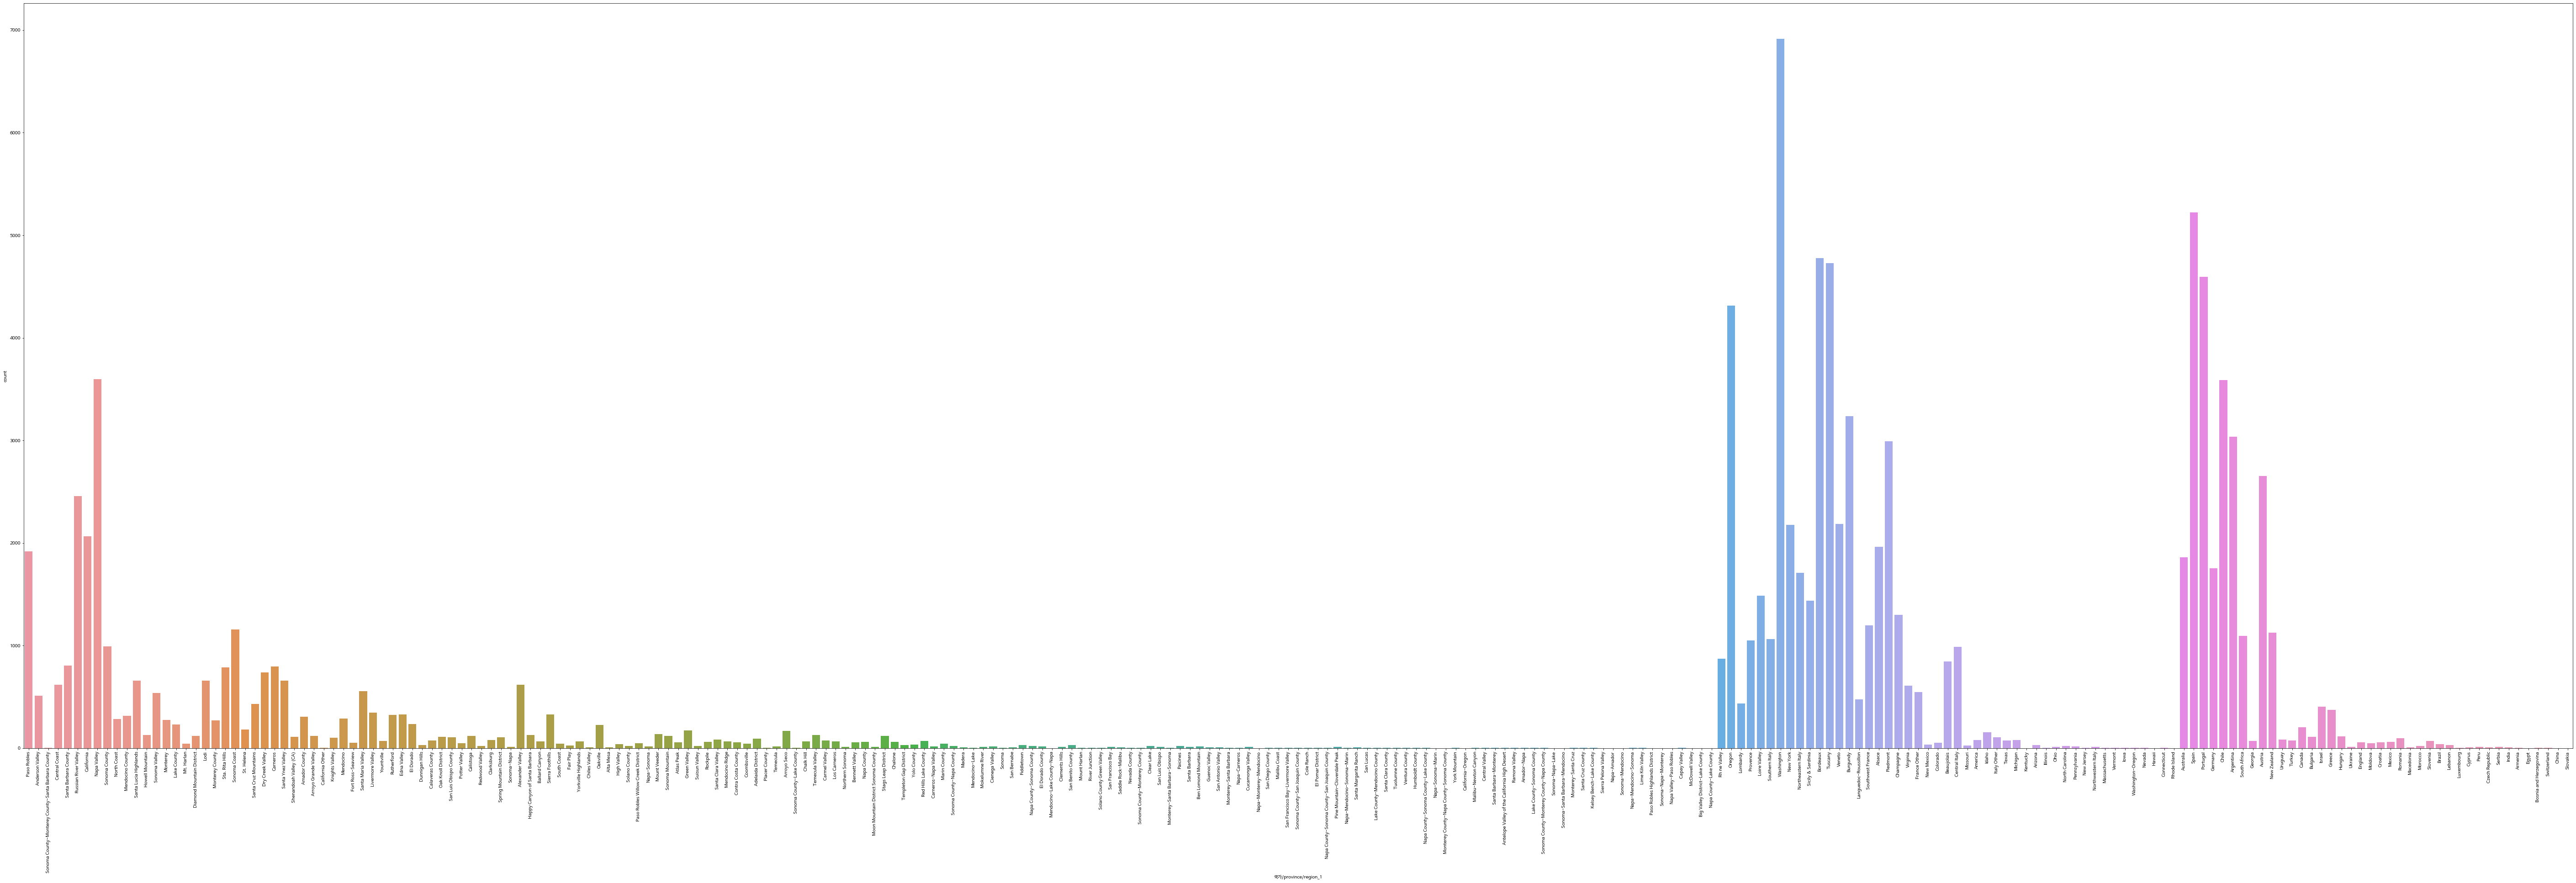

In [27]:
plt.figure(figsize=(100,30))
cnt = sns.countplot(x='region', data=train_region) 
cnt.set_xlabel("국가/province/region_1")
cnt.set_ylabel("count")
plt.xticks(rotation=90) 
plt.show()

# 각 범주가 가지는 데이터가 1만개 이내가 되도록 새롭게 "생산지역" 변수 지정 완료.

#### 새롭게 정의한 region 변수를 사용하는 것과 그냥 country를 사용하는 것 중 더 나은 변수를 파악하기

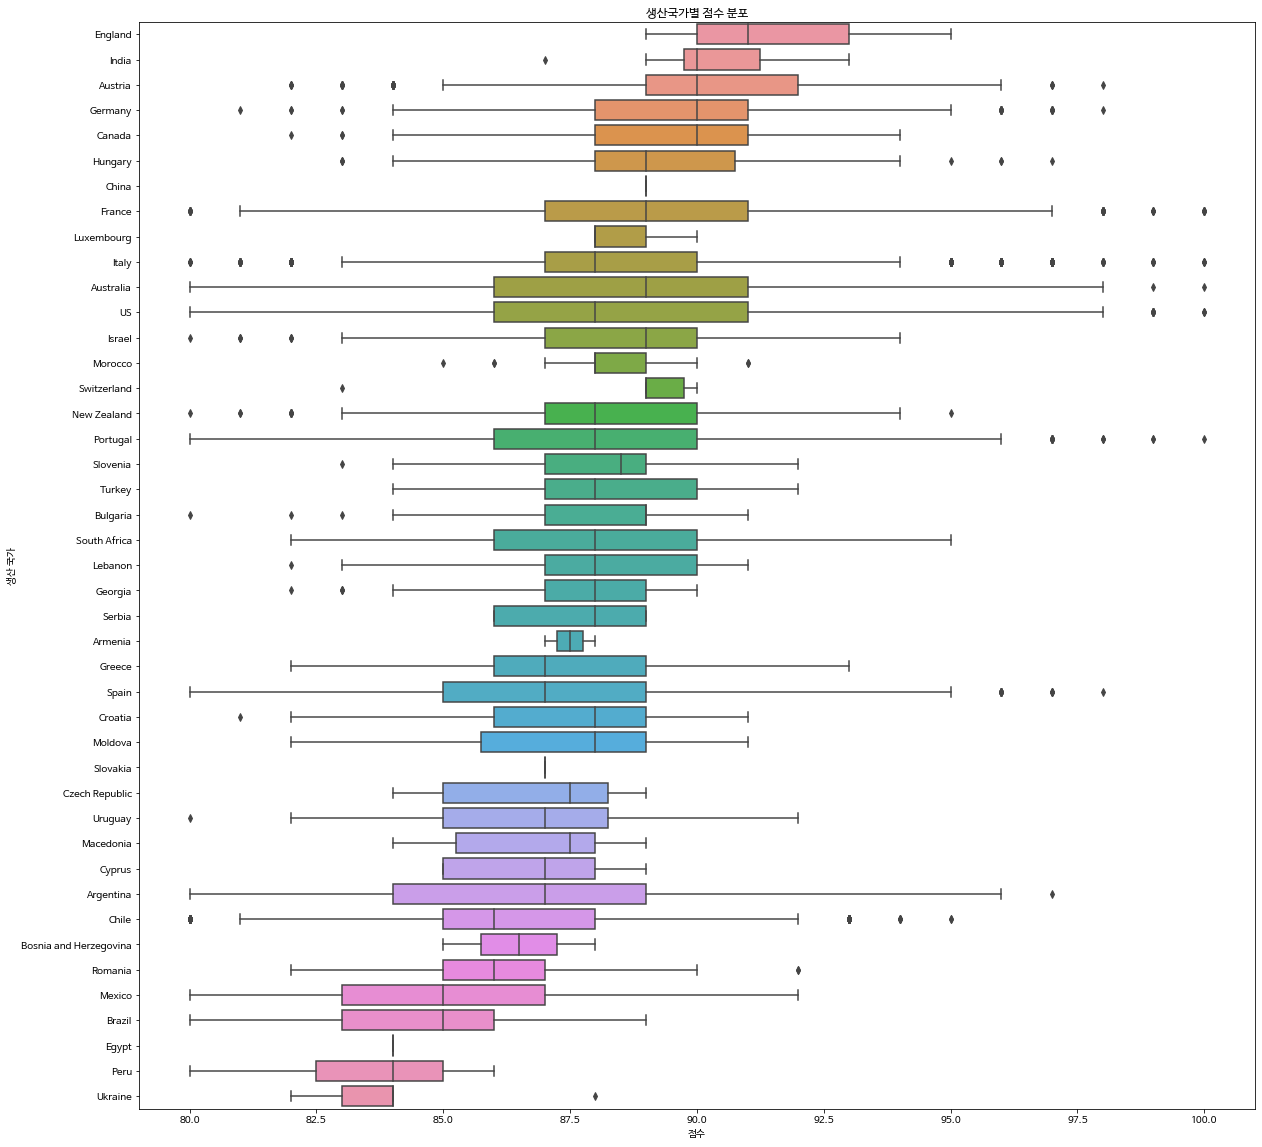

In [28]:
plt.figure(figsize=(20,20))
box = sns.boxplot(y='country', x='points', data=train, 
                  order=train.groupby("country")['points'].mean().sort_values(ascending=False).index)
box.set_xlabel("점수")
box.set_ylabel("생산 국가")
plt.title("생산국가별 점수 분포")
plt.show()

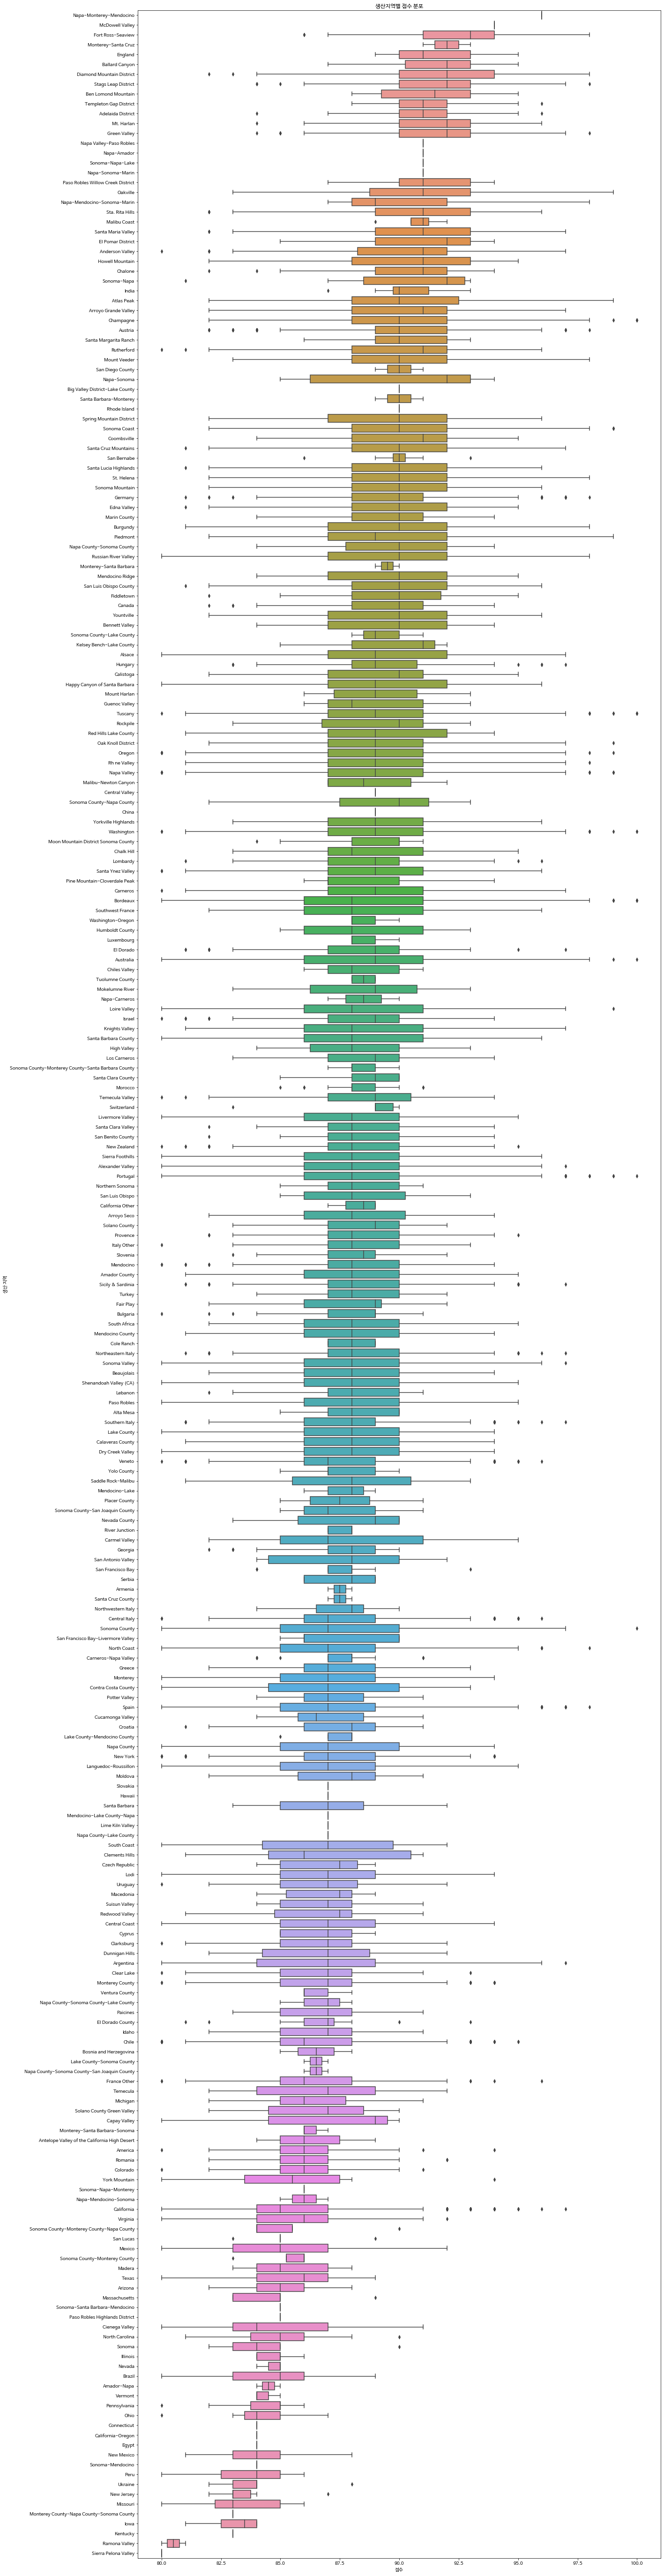

In [29]:
plt.figure(figsize=(20,100))
box = sns.boxplot(y='region', x='points', data=train_region,
                 order=train_region.groupby("region")['points'].mean().sort_values(ascending=False).index)
box.set_xlabel("점수")
box.set_ylabel("생산 지역")
plt.title("생산지역별 점수 분포")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

## EDA (designation)

In [ ]:
df['designation'].nunique()

In [ ]:
top_list_d = df['designation'].value_counts().nlargest(30).index
df_top_d = df[df['designation'].isin(top_list_d)]

In [ ]:
plt.figure(figsize=(10,20))
box = sns.boxplot(y='designation', x='points', data=df_top_d)
box.set_xlabel("점수")
box.set_ylabel("designation")
plt.show()

# EDA (title -> 생산년도)

In [ ]:
import re #숫자만 추출

def year(row):
    numbers = re.findall("\d+", row['title'])
    a = 'none'
    
    if len(numbers) >= 1:
        switch = 1
        for num in numbers:
            if (len(num) == 4) and (num not in row['designation']) and (num not in row['winery']):
                a = int(num)
                switch = 0
                
    elif len(numbers) == 0:
        a = 'none'
    else:
        a = 'error'
    return a

In [ ]:
df['year'] = df.apply(year, axis=1)

In [ ]:
df[df['year']=='none'].shape

In [ ]:
df_elim = df[df['year']!='none']
df_elim = df_elim[(df_elim['year'] > 1970) & (df_elim['year'] < 2022)]
df_elim = df_elim.astype({'year': 'int'})

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_elim.groupby(['year']).points.mean(), marker='o', c='r') # marker: 마커의 모양, c = 라인 색상
plt.xlabel('생산년도')
plt.ylabel('평균 점수')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_elim.groupby(['year']).points.count(), marker='o', c='r') # marker: 마커의 모양, c = 라인 색상
plt.xlabel('생산년도')
plt.ylabel('평균 점수')
plt.show()

In [ ]:
top_year = df['year'].value_counts().nlargest(20).index
df_top_year = df[df['year'].isin(top_year)]

plt.figure(figsize=(10,5))
box = sns.boxplot(y='year', x='points', data=df_top_year)
box.set_xlabel("year")
box.set_ylabel("점수")
plt.show()